env: pythonproject (laptop)

In [276]:
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf') 

In [277]:
import pandas as pd
import glob
from dash import Dash
import dash_core_components as dcc 
import dash_html_components as html 
from dash.dependencies import Input, Output
from detecta import detect_seq
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import re
from scipy.signal import savgol_filter
from scipy.signal import find_peaks, peak_widths
import modules.file_folder_handler as file_folder_handler
import modules.data_transformator as data_transformator
import modules.graph_handler as graph_handler
import modules.peak_detector as peak_detector
import modules.data_uploader as data_uploader
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'

In [278]:
#%conda install dash
#%conda install plotly

In [279]:
data = pd.read_csv('Fluo_mtRCaMP_whole_record\Fluo_mtRCaMP_whole_record.txt', sep='	')
data.head()

Time     Fluo2   mtRCamp
0  0.00  53.28100  49.37500
1  0.01  55.54272  42.25070
2  0.02  57.43230  35.72124
3  0.03  54.02395  37.65986
4  0.04  52.04270  39.46696

### Поиск бейзлайна и вырезание больших пиков в цитозольном кальции (Fluo2)

1. ищем бейзлайн по всей записи -> 
2. если 100 точек подряд, превышающие бейзлан, то найти начало, где происходит превышение бейзлайна
3. найти конец, превышающее бейзлайн 
4. вырезать этот участок

In [280]:
data.columns[1:]

Index(['Fluo2', 'mtRCamp'], dtype='object')

In [281]:
fig = px.line(data,x='Time', y = ['Fluo2', 'mtRCamp'])
fig.show()

Найдем бейзлайн для цитозольного кальция

In [282]:
baseline = data['Fluo2'].mean()#

если 100 точек подряд, превышающие бейзлан, то найти начало, где происходит превышение бейзлайна

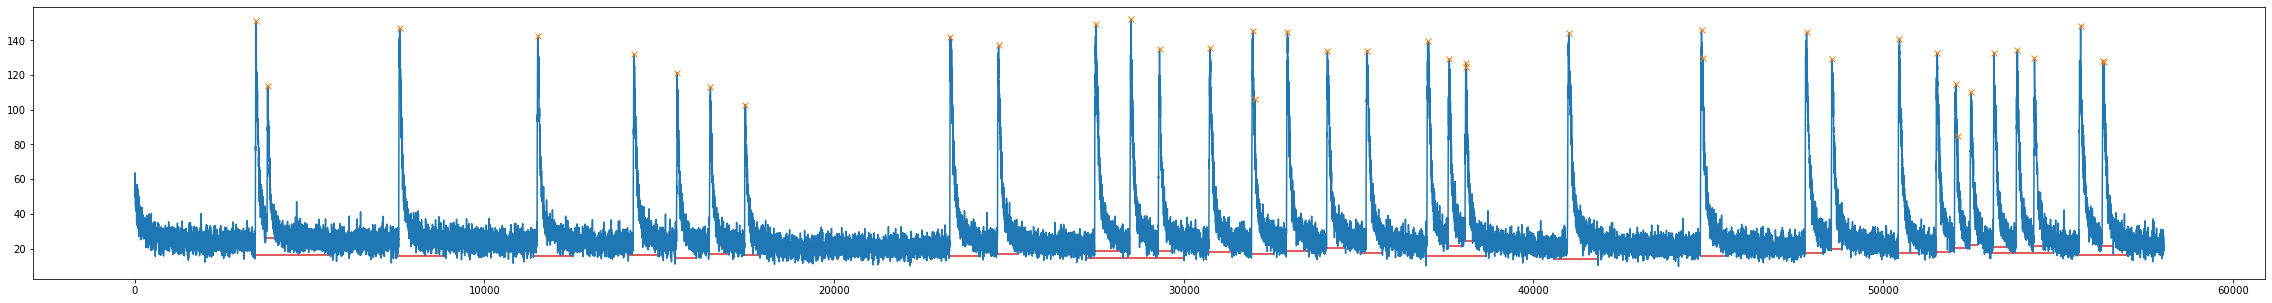

In [335]:
plt.Figure(figsize=(10,30))
x = data.loc[0:,'Fluo2'].reset_index()['Fluo2']
peaks, properties = find_peaks(x, prominence=30, 
                                    wlen = 150, 
                                    height = baseline,
                                    width = 60,
                                    rel_height = 2.5)
results_full = peak_widths(x, peaks, rel_height=0.97)
results_full[0]  # widths
plt.figure(figsize=(40,5))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_full[1:], color="C3")
plt.show()

In [336]:
cut_idx = []
for widths,peak_start, peak_end in zip(results_full[0], results_full[2], results_full[3]):
    if int(widths)>=100:
        ind_range = list(range(int(peak_start),int(peak_end)))
        cut_idx.extend(ind_range)

In [337]:
x.drop(x.index[cut_idx], inplace=True)


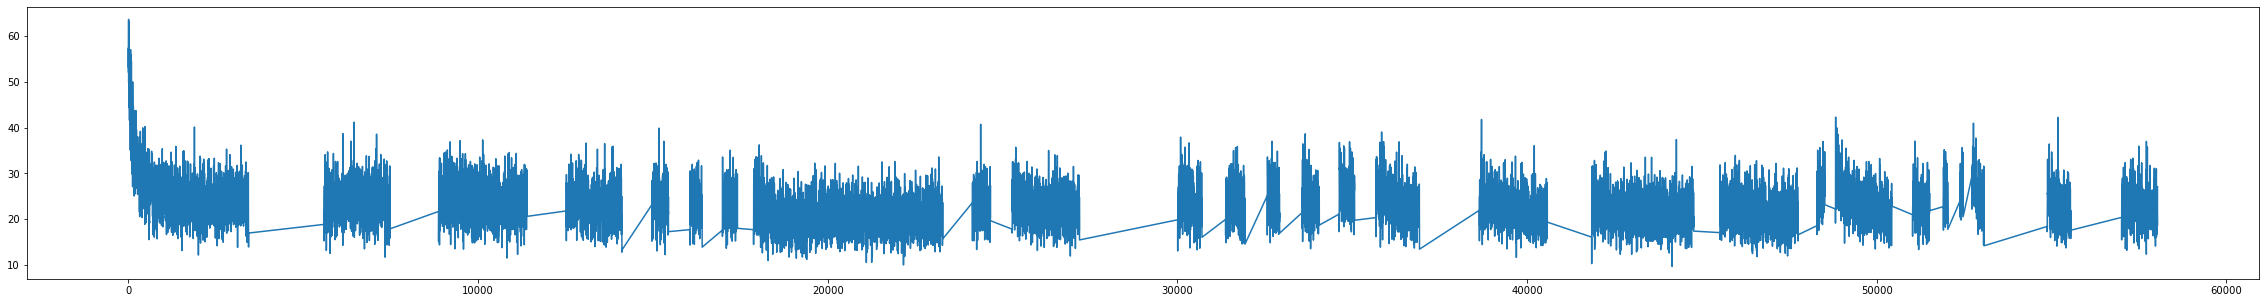

In [338]:
plt.figure(figsize=(40,5))
plt.plot(x)


In [339]:
x.reset_index(drop = True, inplace=True)

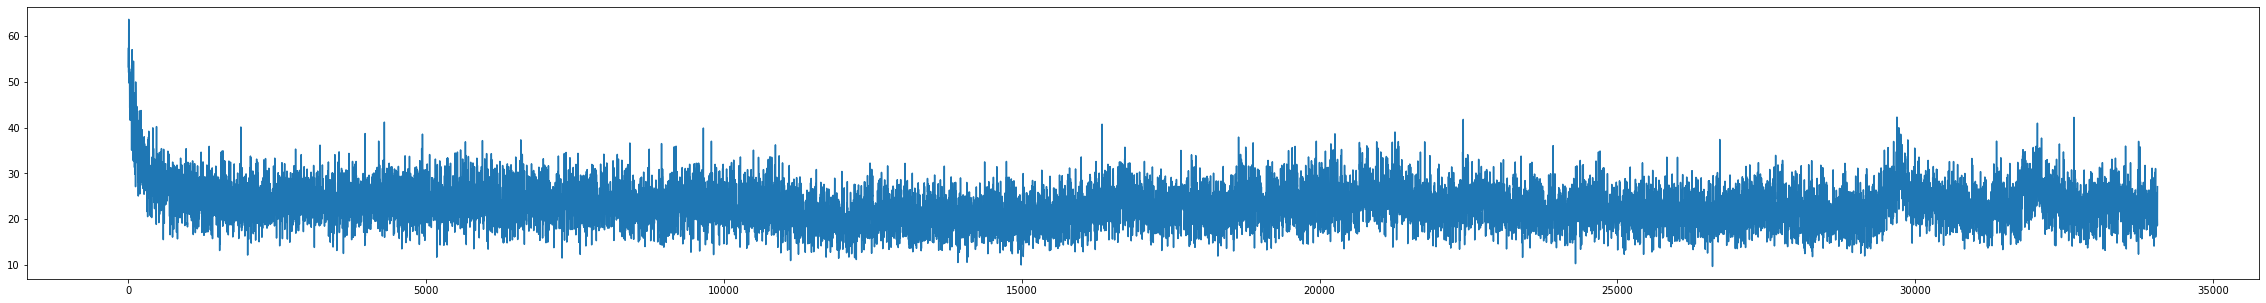

In [340]:
plt.figure(figsize=(40,5))
plt.plot(x)

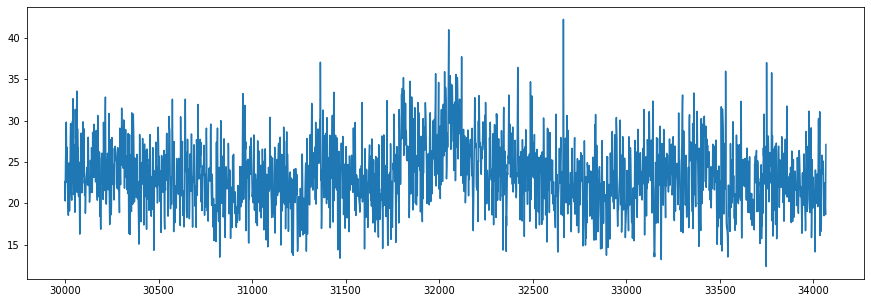

In [341]:
plt.figure(figsize=(15,5))
plt.plot(x[30000:35000])

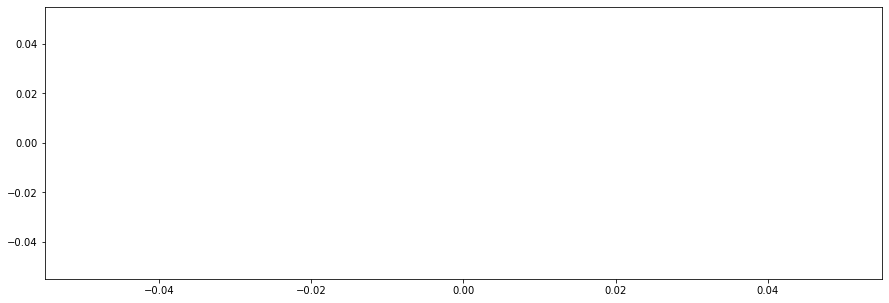

In [342]:
plt.figure(figsize=(15,5))
plt.plot(x[38000:40000])

<AxesSubplot:>

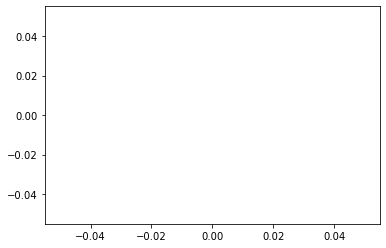

In [343]:
x[38000:40000].plot()